<a href="https://colab.research.google.com/github/alexyev/Grover-s_Algorithm/blob/main/Grover's_Algorithm_2qbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install qiskit
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
!pip install qiskit.visualization
from qiskit.visualization import *
from qiskit.tools.jupyter import *
!pip install ibm_quantum_widgets
from ibm_quantum_widgets import *
from qiskit.tools.monitor import job_monitor


ERROR: Could not find a version that satisfies the requirement qiskit.visualization (from versions: none)
ERROR: No matching distribution found for qiskit.visualization


In [ ]:
IBMQ.save_account("b192a84b3e5f2eac739e5b8133a95e8fe083d401792dbe94efa79e69712e390d51e312279600bc576083bf8b8e829e427306842ad970b3aaa9fd538a6a61623d")
provider = IBMQ.load_account()
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits, num_qubits)

configrc.store_credentials:WARNING:2021-11-28 20:47:11,937: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-11-28 20:47:12,178: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
def initialize_circ(qc, qubits):
  for q in qubits:
    qc.h(q)
  return qc

In [ ]:
grover_circuit = initialize_circ(grover_circuit, [0,1])
grover_circuit.barrier()
grover_circuit.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     └───┘ ░ 
c: 2/════════

We initialize the circuit to an equal superposition by applying Hadamard Gates to both qubits.

In [ ]:
grover_circuit.cz(0, 1)
grover_circuit.barrier()
grover_circuit.draw()

┌───┐ ░     ░ 
q_0: ┤ H ├─░──■──░─
     ├───┤ ░  │  ░ 
q_1: ┤ H ├─░──■──░─
     └───┘ ░     ░ 
c: 2/══════════════

The Controlled-Z gate serves as our oracle for the |11⟩ state.

In [ ]:
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.barrier()
grover_circuit.measure([0,1], [0, 1])
grover_circuit.draw()

┌───┐ ░     ░ ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ ░  │  ░ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘ ░     ░ └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════════╩══╩═
                                         0  1

We create a diffuser - H's followed by Z's, a Controlled-Z, and H's, and then measure the results of the circuit to 2 classical bits.

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots = 1)
result = job.result()
counts = result.get_counts()
print(counts)


{'11': 1}


When we run our circuit on a quantum simulator once, we get the |11⟩ that we were expecting!

Now let's run this program on a real quantum computer.

In [ ]:
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print(device)

ibmq_quito


This code will find the least busy quantum computer in IBM's network, and prints the result

In [ ]:
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


This code will run the job on the quantum computer and keep track of the status.



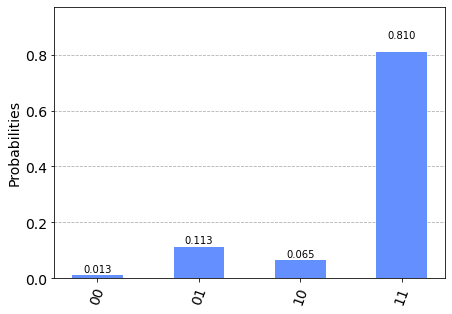

In [ ]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

Running on a real quantum computer, we get the output |11〉81% of the time!



The other possibilities are faults while running the quantum computation.